# Final Project Exploratory Data Analysis


## Project Title: The Impact of Urban Planning and Design on Obesity Levels
- Andrew Noonan
- AJN104@pitt.edu

### Project Abstract
Research question: What is the impact of Urban Planning/Walkability on Obesity Levels within Allegheny County?
This is interesting to me because it allows me investigate whether a statistically significant contributor to the rise in Obesity within the United States is due to the historical transition away from cities that were easily navigable by foot as well as public transportation like trains, to cities that are increasing only able to be traversed by car.I consider this project useful because we are increasingly facing a public health crisis with the rise in obesity in the United States. If it can be proven that cities that are more friendly to alternative means of transportation decrease obesity rates, perhaps that will sway policy makers to utilize another technique in improving Public Health. Leading from that, I believe policy makers would certainly benefit from my model.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
walk_score = pd.read_csv('walkscorect.xls-walk-score-by-ct.csv')
obesity_rates = pd.read_csv('obesity-ac-2006-2010censustracts.csv')
transit = pd.read_csv('prt.csv')
census_tracts = pd.read_csv('census_tracts.csv')

In [3]:
census_tracts.head()

,_id,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,shape_area,shape_length
0,10759,1,42,3,40500,1,420030405001,Block Group 1,G5030,S,...,7,40500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450
1,10760,2,42,3,40400,1,420030404001,Block Group 1,G5030,S,...,6,40400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123
2,10761,3,42,3,40200,2,420030402002,Block Group 2,G5030,S,...,5,40200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081
3,10762,4,42,3,30500,2,420030305002,Block Group 2,G5030,S,...,4,30500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444
4,10763,5,42,3,980000,1,420039800001,Block Group 1,G5030,S,...,125,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089


In [4]:
walk_score.isnull().sum()
walk_score.head(25)


,Census Tract,Walk Score
0,10300,82
1,20100,100
2,20300,83
3,30500,77
4,40200,71
5,40400,82
6,40500,78
7,40600,75
8,40900,68
9,50100,60


Dropping Null Values

In [5]:
obesity_rates.isnull().sum()
obesity_rates = obesity_rates.dropna()
obesity_rates.isnull().sum()
obesity_rates = obesity_rates.drop(['stname','MUNICIPALITY','tractfips', 'Municipality', '2000 Tract'], axis=1) # drop columns that are not needed
obesity_rates.head(25)

,2010 Tract,City Neighborhood,2006-2010 estimate of obesity
59,562900,Hazelwood,0.399853
364,561600,Arlington,0.334520
365,561600,Arlington Heights,0.473120
366,561700,Saint Clair,0.699500
367,561700,Mount Oliver Neighborhood,0.380567
368,"561900, 980000 & 981800",Lincoln-Lemington-Belmar,0.637099
369,562000 & 982200,North Oakland,0.070353
370,562300,Hazelwood,0.371847
371,562300,Glen Hazel,0.383138
372,562400,Bon Air,0.289505


Choosing to drop null values

In [6]:

transit.isnull().sum()
transit = transit.dropna()
transit.isnull().sum()
# drop columns that are not needed
transit = transit.drop(['Direction','CleverID','Direction', 'Routes_ser', 'Routes_cou', 'Mode', 'Shelter', 'Stop_type', 'On_avwk_FY', 'Off_avwk_F', 'On_avwk__1', 'Off_avwk_1', 'AvgWkdy_De', 'Timepoint', 'x', 'y'], axis=1)
transit.head(25)

,FID,StopID,Stop_name,Latitude,Longitude
0,1,E41755,NEGLEY AVE AT EAST BUSWAY STEPS,40.456073,-79.933320
1,2,E41760,NEGLEY AVE AT EAST LIBERTY BLVD,40.467388,-79.928150
2,3,E41770,NEGLEY AVE AT ELLSWORTH AVE,40.454623,-79.932406
3,4,E41771,NEGLEY AVE AT ELLSWORTH AVE,40.454766,-79.932659
4,5,E41780,NEGLEY AVE AT ELMER ST,40.453376,-79.931705
5,6,E41781,NEGLEY AVE AT ELMER ST FS,40.453283,-79.931823
6,7,E41790,NEGLEY AVE AT FRIENDSHIP AVE,40.460837,-79.932492
7,8,E41800,NEGLEY AVE AT FRIENDSHIP AVE,40.460442,-79.932349
8,9,E41810,NEGLEY AVE AT HAMPTON ST,40.475643,-79.924655
9,10,E41820,NEGLEY AVE AT HAMPTON ST,40.475199,-79.924472


In [7]:
environmental_justice_areas = gpd.read_file('environmental-justice-areas.geojson.geojson')

In [8]:
environmental_justice_areas.head(25)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,TRACTCENUM,FID_1,TRACT,EJ_Area,geometry
0,42,003,431100,42003431100,4311,Census Tract 4311,431100.0,13,431100,0,"MULTIPOLYGON (((-80.04602 40.49487, -80.04553 ..."
1,42,003,432300,42003432300,4323,Census Tract 4323,432300.0,339,432300,0,"MULTIPOLYGON (((-80.0616 40.50581, -80.0616 40..."
2,42,003,563800,42003563800,5638,Census Tract 5638,563800.0,300,563800,0,"MULTIPOLYGON (((-80.12156 40.53626, -80.11346 ..."
3,42,003,563300,42003563300,5633,Census Tract 5633,563300.0,299,563300,0,"MULTIPOLYGON (((-80.13451 40.58823, -80.13282 ..."
4,42,003,451104,42003451104,4511.04,Census Tract 4511.04,451104.0,29,451104,0,"MULTIPOLYGON (((-80.24876 40.55465, -80.24825 ..."
5,42,003,451105,42003451105,4511.05,Census Tract 4511.05,451105.0,191,451105,0,"MULTIPOLYGON (((-80.22144 40.51698, -80.22136 ..."
6,42,003,564000,42003564000,5640,Census Tract 5640,564000.0,307,564000,0,"MULTIPOLYGON (((-80.23296 40.45498, -80.23306 ..."
7,42,003,562900,42003562900,5629,Census Tract 5629,562900.0,380,562900,1,"MULTIPOLYGON (((-79.95628 40.42912, -79.95613 ..."
8,42,003,453003,42003453003,4530.03,Census Tract 4530.03,453003.0,193,453003,0,"MULTIPOLYGON (((-80.17253 40.436, -80.1726 40...."
9,42,003,434000,42003434000,4340,Census Tract 4340,434000.0,26,434000,0,"MULTIPOLYGON (((-80.07536 40.50884, -80.07534 ..."


In [9]:
environmental_justice_areas.rename(columns={'TRACTCE': 'census_tract'}, inplace=True)

In [10]:
environmental_justice_areas.head()

,STATEFP,COUNTYFP,census_tract,GEOID,NAME,NAMELSAD,TRACTCENUM,FID_1,TRACT,EJ_Area,geometry
0,42,003,431100,42003431100,4311,Census Tract 4311,431100.0,13,431100,0,"MULTIPOLYGON (((-80.04602 40.49487, -80.04553 ..."
1,42,003,432300,42003432300,4323,Census Tract 4323,432300.0,339,432300,0,"MULTIPOLYGON (((-80.0616 40.50581, -80.0616 40..."
2,42,003,563800,42003563800,5638,Census Tract 5638,563800.0,300,563800,0,"MULTIPOLYGON (((-80.12156 40.53626, -80.11346 ..."
3,42,003,563300,42003563300,5633,Census Tract 5633,563300.0,299,563300,0,"MULTIPOLYGON (((-80.13451 40.58823, -80.13282 ..."
4,42,003,451104,42003451104,4511.04,Census Tract 4511.04,451104.0,29,451104,0,"MULTIPOLYGON (((-80.24876 40.55465, -80.24825 ..."


In [11]:
environmental_justice_areas.drop(['STATEFP', 'COUNTYFP', 'GEOID', 'NAME', 'NAMELSAD', 'TRACTCENUM','FID_1', 'TRACT'], axis=1, inplace=True)

In [12]:
environmental_justice_areas.head()

,census_tract,EJ_Area,geometry
0,431100,0,"MULTIPOLYGON (((-80.04602 40.49487, -80.04553 ..."
1,432300,0,"MULTIPOLYGON (((-80.0616 40.50581, -80.0616 40..."
2,563800,0,"MULTIPOLYGON (((-80.12156 40.53626, -80.11346 ..."
3,563300,0,"MULTIPOLYGON (((-80.13451 40.58823, -80.13282 ..."
4,451104,0,"MULTIPOLYGON (((-80.24876 40.55465, -80.24825 ..."


In [13]:
environmental_justice_areas.drop(['geometry'], axis=1, inplace=True)

In [14]:
environmental_justice_areas.head()

,census_tract,EJ_Area
0,431100,0
1,432300,0
2,563800,0
3,563300,0
4,451104,0


In [15]:
environmental_justice_areas['census_tract'].astype('Int64')

0      431100
1      432300
2      563800
3      563300
4      451104
        ...  
397    980400
398    980500
399    980300
400    981000
401    981800
Name: census_tract, Length: 402, dtype: Int64

### Why I chose to drop missing values
I choose to drop missing values, because for most of the missing values in this dataset an average doesn't make sense.

### Visualizing Data/Outliers

In [16]:
transit_geo = gpd.read_file('prt-stops.geojson.geojson')

In [17]:
transit_geo.head()

,StopID,Stop_name,CleverID,Direction,Timepoint,Routes_ser,Routes_cou,Latitude,Longitude,Mode,Shelter,Stop_type,On_avwk_FY,Off_avwk_F,On_avwk__1,Off_avwk_1,AvgWkdy_De,geometry
0,E00175,26TH ST AT PENN AVE FS (SPRING WAY),2593.0,Inbound,N,"54, 88, 91",3.0,40.454635,-79.978170,Bus,No Shelter,Bus Stop,34.531580,43.900523,35,44,0.03,POINT (-79.97817 40.45464)
1,E00180,28TH ST AT LIBERTY AVE,2161.0,Inbound,N,54,1.0,40.456288,-79.974651,Bus,No Shelter,Bus Stop,1.304759,10.216890,1,10,0.03,POINT (-79.97465 40.45629)
2,E00270,32ND ST AT SPRING WAY,2410.0,Outbound,N,"54, 88, 91",3.0,40.460347,-79.969436,Bus,No Shelter,Bus Stop,13.184478,33.410865,13,33,0.04,POINT (-79.96944 40.46035)
3,E00420,40TH ST AT BUTLER ST,1199.0,Outbound,N,93,1.0,40.468655,-79.962115,Bus,No Shelter,Bus Stop,1.038249,28.682688,1,29,0.05,POINT (-79.96212 40.46866)
4,E00430,40TH ST AT DAVIDSON ST FS,20106.0,Outbound,N,93,1.0,40.467676,-79.960929,Bus,No Shelter,Bus Stop,0.163421,12.588603,0,13,0.00,POINT (-79.96093 40.46768)


<Axes: >

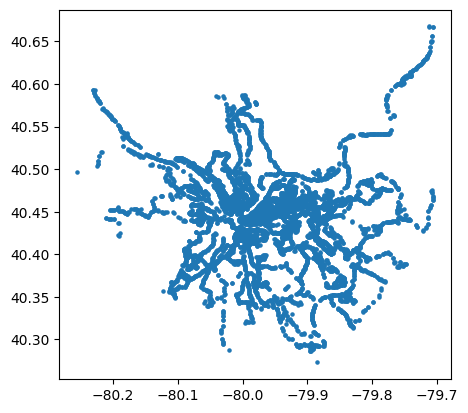

In [18]:
transit_geo.plot(markersize=5)

<Axes: >

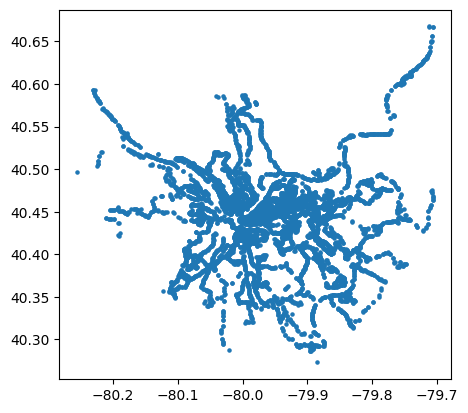

In [19]:
census_tracts_geo = gpd.read_file('pittsburghpa2010-census-tracts.geojson.geojson')
census_tracts_geo.set_crs(epsg=4326, allow_override=True, inplace=True)
transit_geo.set_crs(epsg=4326, allow_override=True, inplace=True)
transit_geo.plot(markersize=5)

<Axes: >

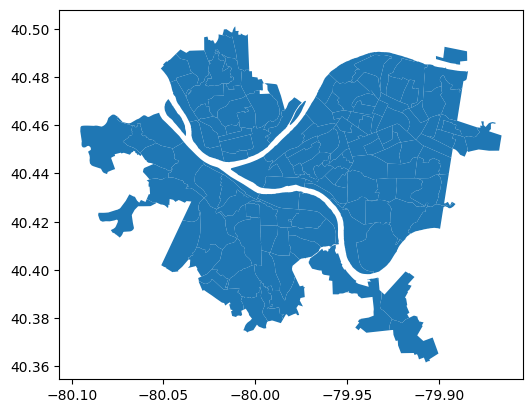

In [20]:
census_tracts_geo.plot()

In [21]:
census_tracts_geo.columns
census_tracts_geo.head()

,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,aland10,...,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,Shape__Area,Shape__Length,geometry
0,1,42,003,040500,1,420030405001,Block Group 1,G5030,S,268195,...,040500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,42,003,040400,1,420030404001,Block Group 1,G5030,S,75472,...,040400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123,"POLYGON ((-79.94727 40.44703, -79.94716 40.446..."
2,3,42,003,040200,2,420030402002,Block Group 2,G5030,S,282679,...,040200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,4,42,003,030500,2,420030305002,Block Group 2,G5030,S,284548,...,030500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,42,003,980000,1,420039800001,Block Group 1,G5030,S,637235,...,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089,"POLYGON ((-79.8846 40.49066, -79.88451 40.4867..."


In [22]:
transit_geo.columns
transit_geo_filtered = transit_geo[transit_geo.geometry.within(census_tracts_geo.unary_union)]

/tmp/ipykernel_14017/2289483868.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  transit_geo_filtered = transit_geo[transit_geo.geometry.within(census_tracts_geo.unary_union)]


,StopID,Stop_name,CleverID,Direction,Timepoint,Routes_ser,Routes_cou,Latitude,Longitude,Mode,Shelter,Stop_type,On_avwk_FY,Off_avwk_F,On_avwk__1,Off_avwk_1,AvgWkdy_De,geometry
0,E00175,26TH ST AT PENN AVE FS (SPRING WAY),2593.0,Inbound,N,"54, 88, 91",3.0,40.454635,-79.978170,Bus,No Shelter,Bus Stop,34.531580,43.900523,35,44,0.03,POINT (-79.97817 40.45464)
1,E00180,28TH ST AT LIBERTY AVE,2161.0,Inbound,N,54,1.0,40.456288,-79.974651,Bus,No Shelter,Bus Stop,1.304759,10.216890,1,10,0.03,POINT (-79.97465 40.45629)
2,E00270,32ND ST AT SPRING WAY,2410.0,Outbound,N,"54, 88, 91",3.0,40.460347,-79.969436,Bus,No Shelter,Bus Stop,13.184478,33.410865,13,33,0.04,POINT (-79.96944 40.46035)
3,E00420,40TH ST AT BUTLER ST,1199.0,Outbound,N,93,1.0,40.468655,-79.962115,Bus,No Shelter,Bus Stop,1.038249,28.682688,1,29,0.05,POINT (-79.96212 40.46866)
4,E00430,40TH ST AT DAVIDSON ST FS,20106.0,Outbound,N,93,1.0,40.467676,-79.960929,Bus,No Shelter,Bus Stop,0.163421,12.588603,0,13,0.00,POINT (-79.96093 40.46768)


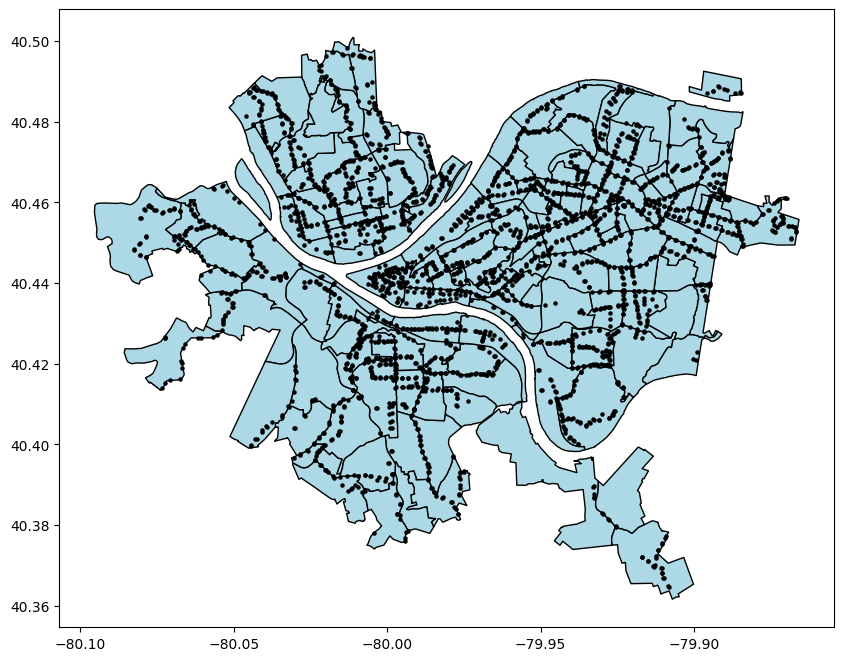

In [23]:
fig,ax = plt.subplots(figsize=(10,10))
census_tracts_geo.plot(ax=ax, color='lightblue', edgecolor='black')
transit_geo_filtered.plot(ax=ax, color='black', markersize=5)
transit_geo_filtered.head()

In [24]:
transit_with_tracts = gpd.sjoin(transit_geo_filtered, census_tracts_geo, how="left", predicate="within")


In [25]:
transit_with_tracts.head()

,StopID,Stop_name,CleverID,Direction,Timepoint,Routes_ser,Routes_cou,Latitude,Longitude,Mode,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,Shape__Area,Shape__Length
0,E00175,26TH ST AT PENN AVE FS (SPRING WAY),2593.0,Inbound,N,"54, 88, 91",3.0,40.454635,-79.978170,Bus,...,3,020300,1,110,730,15.068493,15.06,No,1.694875e+07,24019.532672
1,E00180,28TH ST AT LIBERTY AVE,2161.0,Inbound,N,54,1.0,40.456288,-79.974651,Bus,...,3,020300,1,110,730,15.068493,15.06,No,1.694875e+07,24019.532672
2,E00270,32ND ST AT SPRING WAY,2410.0,Outbound,N,"54, 88, 91",3.0,40.460347,-79.969436,Bus,...,3,020300,1,110,730,15.068493,15.06,No,1.694875e+07,24019.532672
3,E00420,40TH ST AT BUTLER ST,1199.0,Outbound,N,93,1.0,40.468655,-79.962115,Bus,...,28,090200,3,1370,2805,48.841355,48.84,No,4.755655e+06,10005.363139
4,E00430,40TH ST AT DAVIDSON ST FS,20106.0,Outbound,N,93,1.0,40.467676,-79.960929,Bus,...,28,090200,3,1370,2805,48.841355,48.84,No,4.755655e+06,10005.363139


In [26]:
points_counts = transit_with_tracts.groupby('tractce10').size().reset_index(name='point_count')

In [27]:
points_counts.head()

,tractce10,point_count
0,010300,29
1,020100,104
2,020300,31
3,030500,29
4,040200,35


In [28]:
farmers_markets = gpd.read_file('farmers_markets.geojson.geojson')
farmers_markets.set_crs(epsg=4326, allow_override=True, inplace=True)
farmers_markets_filtered = farmers_markets[farmers_markets.geometry.within(census_tracts_geo.union_all('unary'))]

<Axes: >

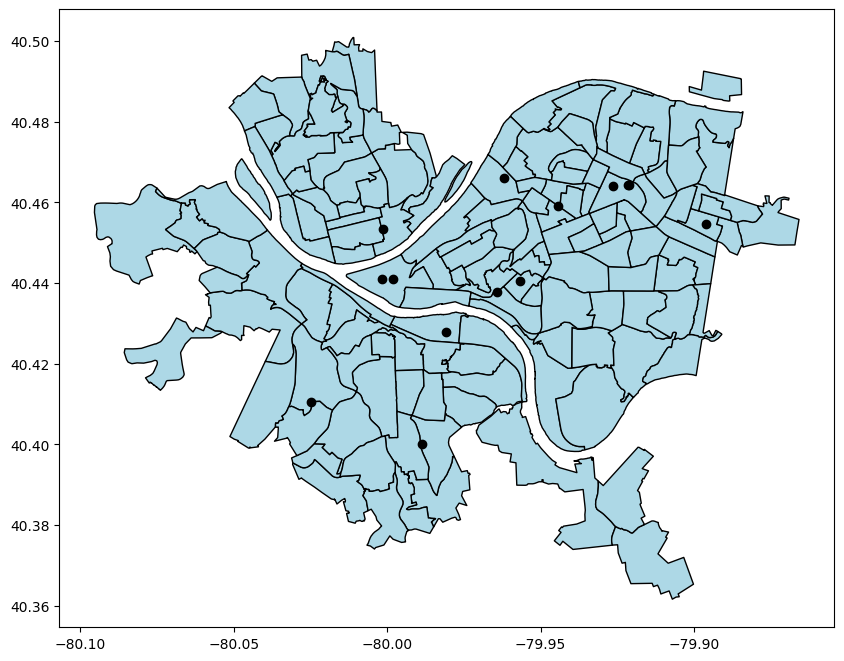

In [29]:
fig,ax = plt.subplots(figsize=(10,10))
census_tracts_geo.plot(ax=ax, color='lightblue', edgecolor='black')
farmers_markets_filtered.plot(ax=ax, color='black')

In [30]:
farmers_markets_filtered_tracts = gpd.sjoin(farmers_markets_filtered, census_tracts_geo, how="left", predicate="within")


In [31]:
farmers_markets_filtered_tracts.head()

,FID,Name,X,Y,Location__,Address,City,State,Zip,Day_Time,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,Shape__Area,Shape__Length
2,3,Alma Illery Medical Center—Green Grocer,-79.896214,40.454592,,7227 Hamilton Avenue,Pittsburgh,PA,15208,Friday 11:30 AM—12:30 PM,...,47,130300,3,995,1280,77.734375,77.73,Yes,5.870150e+06,11632.684851
7,8,Beechview Farmer’s Market—Citiparks,-80.024680,40.410619,Broadway Avenue & Beechview Avenue,Broadway Avenue,Pittsburgh,PA,15216,Thursday 4:00 pm—7:00 pm,...,73,191600,5,2490,4445,56.017998,56.01,Yes,2.603900e+07,25482.363647
9,10,Bloomfield Farmer’s Market,-79.944362,40.459080,,5050 Liberty Avenue,Pittsburgh,PA,15224,Saturday 9:00 AM—1:00 PM,...,23,080400,2,970,1550,62.580645,62.58,Yes,4.632287e+06,11705.182076
12,13,Carrick Dairy District—Citiparks,-79.988647,40.400038,,1529 Brownsville Road,Pittsburgh,PA,15210,Wednesday 3:00 PM—7:00 PM,...,102,290200,5,2455,4015,61.145704,61.14,Yes,1.570340e+07,20894.703157
17,18,East Liberty Farmer’s Market,-79.926390,40.464192,next to McDonald’s,Penn Circle West,Pittsburgh,PA,15206,Monday 3:00 PM—7:00 PM,...,40,111500,4,2380,2960,80.405405,80.40,Yes,1.037261e+07,15392.403721


In [32]:
num_farmers_markets = farmers_markets_filtered_tracts.groupby('tractce10').size().reset_index(name='fm_count')

In [33]:
num_farmers_markets.head()

,tractce10,fm_count
0,020100,2
1,040200,1
2,040500,1
3,060300,1
4,080400,1


In [34]:
num_farmers_markets['tractce10'] = num_farmers_markets['tractce10'].str.lstrip('0')

In [35]:
num_farmers_markets.head()

,tractce10,fm_count
0,20100,2
1,40200,1
2,40500,1
3,60300,1
4,80400,1


In [36]:
parks = gpd.read_file('parks.geojson.geojson')

In [37]:
parks.head()

,OBJECTID_1,objectid,acreage,sqft,final_cat,type_,sector,origpkname,updatepknm,alterntnam,...,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,GlobalID_1,Shape__Area,Shape__Length,geometry
0,1202,36.0,0.959034,41775.367101,Neighborhood Park,NP,15,Cliffside Parklet,August Wilson Park,Cliffside Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Schenley,0.959034302188266,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012,"POLYGON ((-79.98614 40.44665, -79.98613 40.446..."
1,1203,198.0,2.060117,89738.347520,Neighborhood Park,NP,2,Young Field,Young Field Park,Young Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Riverview,2.06011722852731,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181,"POLYGON ((-80.03313 40.47289, -80.03314 40.473..."
2,1204,158.0,0.468682,20415.724875,Neighborhood Park,NP,8,Revenue Park,Roland Lockridge Community Park,Roland Lockridge Community Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Frick,0.468682427403543,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235,"POLYGON ((-79.92039 40.39402, -79.92047 40.393..."
3,1205,72.0,1.955430,85178.182207,Neighborhood Park,NP,12,Friendship Park,Friendship Park,Friendship Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Highland,1.95542981911229,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871,"POLYGON ((-79.94539 40.46264, -79.94486 40.462..."
4,1206,87.0,5.108070,222506.623799,Neighborhood Park,NP,12,Heths Playground,Heth's Park,Heth's Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Highland,5.10806964711613,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997,"POLYGON ((-79.92675 40.47832, -79.92722 40.477..."


In [38]:
parks_filtered = parks[parks.geometry.within(census_tracts_geo.unary_union)]

/tmp/ipykernel_14017/1023920417.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  parks_filtered = parks[parks.geometry.within(census_tracts_geo.unary_union)]


In [39]:
parks_filtered.head()

,OBJECTID_1,objectid,acreage,sqft,final_cat,type_,sector,origpkname,updatepknm,alterntnam,...,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,GlobalID_1,Shape__Area,Shape__Length,geometry
0,1202,36.0,0.959034,41775.367101,Neighborhood Park,NP,15,Cliffside Parklet,August Wilson Park,Cliffside Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Schenley,0.959034302188266,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012,"POLYGON ((-79.98614 40.44665, -79.98613 40.446..."
1,1203,198.0,2.060117,89738.347520,Neighborhood Park,NP,2,Young Field,Young Field Park,Young Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Riverview,2.06011722852731,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181,"POLYGON ((-80.03313 40.47289, -80.03314 40.473..."
2,1204,158.0,0.468682,20415.724875,Neighborhood Park,NP,8,Revenue Park,Roland Lockridge Community Park,Roland Lockridge Community Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Frick,0.468682427403543,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235,"POLYGON ((-79.92039 40.39402, -79.92047 40.393..."
3,1205,72.0,1.955430,85178.182207,Neighborhood Park,NP,12,Friendship Park,Friendship Park,Friendship Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Highland,1.95542981911229,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871,"POLYGON ((-79.94539 40.46264, -79.94486 40.462..."
4,1206,87.0,5.108070,222506.623799,Neighborhood Park,NP,12,Heths Playground,Heth's Park,Heth's Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Highland,5.10806964711613,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997,"POLYGON ((-79.92675 40.47832, -79.92722 40.477..."


<Axes: >

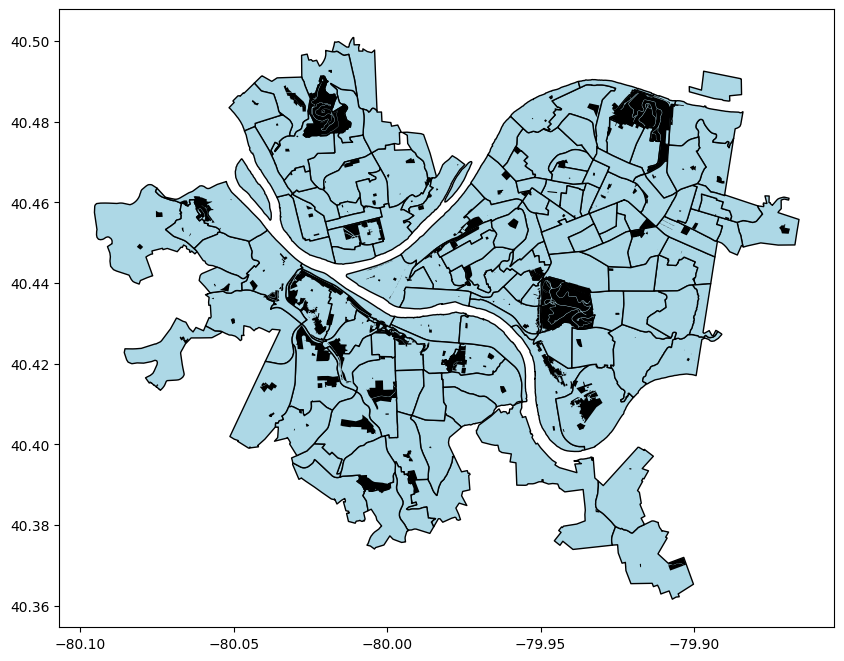

In [40]:
fig,ax = plt.subplots(figsize=(10,10))
census_tracts_geo.plot(ax=ax, color='lightblue', edgecolor='black')
parks_filtered.plot(ax=ax, color='black')

In [41]:
parks_filtered_tracts = gpd.sjoin(parks_filtered, census_tracts_geo, how="inner", predicate="within")

In [42]:
parks_filtered_tracts.head()

,OBJECTID_1,objectid_left,acreage,sqft,final_cat,type_,sector,origpkname,updatepknm,alterntnam,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,Shape__Area_right,Shape__Length_right
0,1202,36.0,0.959034,41775.367101,Neighborhood Park,NP,15,Cliffside Parklet,August Wilson Park,Cliffside Park,...,4,030500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444
1,1203,198.0,2.060117,89738.347520,Neighborhood Park,NP,2,Young Field,Young Field Park,Young Park,...,98,271500,3,2145,2990,71.739130,71.73,Yes,1.504366e+07,26355.303026
2,1204,158.0,0.468682,20415.724875,Neighborhood Park,NP,8,Revenue Park,Roland Lockridge Community Park,Roland Lockridge Community Park,...,106,310300,1,270,975,27.692308,27.69,No,2.214535e+07,22945.937276
3,1205,72.0,1.955430,85178.182207,Neighborhood Park,NP,12,Friendship Park,Friendship Park,Friendship Park,...,26,080900,2,895,1635,54.740061,54.74,Yes,4.092374e+06,11960.203187
5,1207,58.0,0.853850,37193.575085,Regional Park,RP,6,Eileen McCoy Parklet,Emerald View Park - Eileen McCoy Park,Emerald View Regional Park,...,70,191100,2,1030,2525,40.792079,40.79,No,1.736182e+07,19324.721022


In [43]:
parks_counts = parks_filtered_tracts.groupby('tractce10_1').size().reset_index(name='parks_count')

In [44]:
parks_counts.head(25)

,tractce10_1,parks_count
0,010300,1
1,020100,8
2,020300,2
3,030500,3
4,040200,1
5,040500,1
6,040600,3
7,040900,6
8,050100,1
9,050600,1


<Axes: xlabel='parks_count', ylabel='Count'>

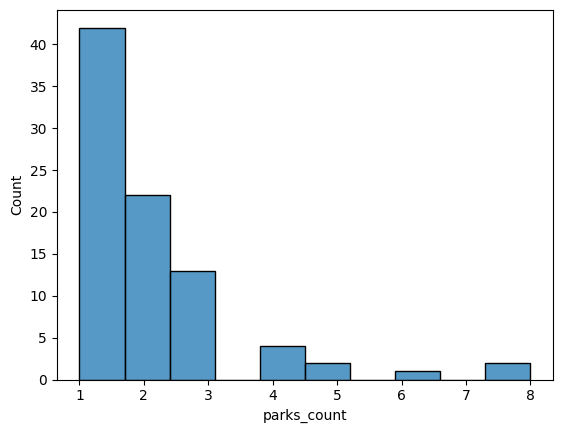

In [45]:
sns.histplot(data=parks_counts, x='parks_count', bins=10)

<Axes: xlabel='parks_count'>

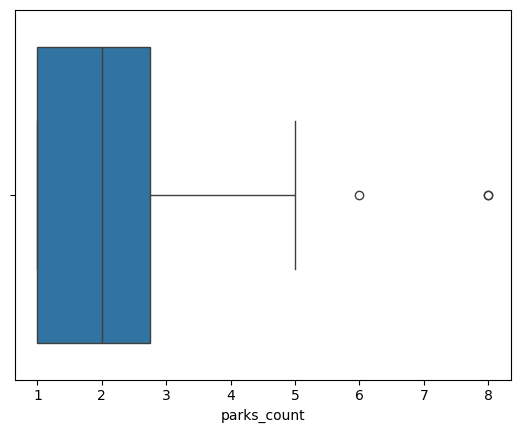

In [46]:
sns.boxplot(data=parks_counts, x='parks_count')

In [47]:
parks_counts['parks_count'].describe()

count    86.000000
mean      2.011628
std       1.442989
min       1.000000
25%       1.000000
50%       2.000000
75%       2.750000
max       8.000000
Name: parks_count, dtype: float64

<Axes: xlabel='fm_count', ylabel='Count'>

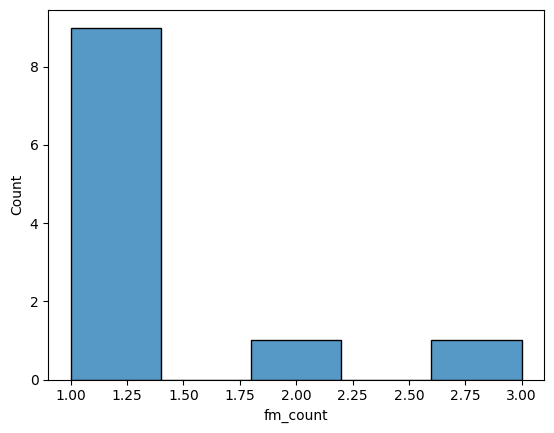

In [48]:
sns.histplot(data=num_farmers_markets, x=num_farmers_markets['fm_count'])

<Axes: xlabel='fm_count'>

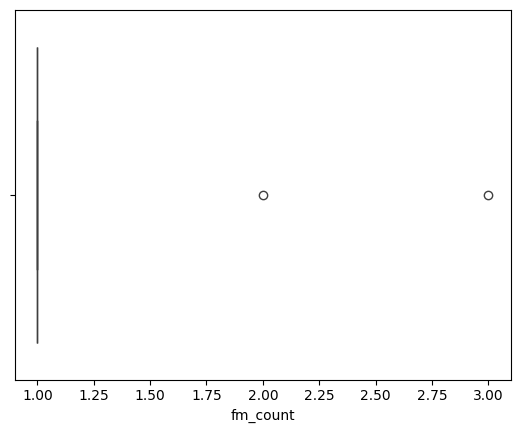

In [49]:
sns.boxplot(data=num_farmers_markets, x='fm_count')

In [50]:
num_farmers_markets['log_base10'] = np.log10(num_farmers_markets['fm_count'])
print(num_farmers_markets)

   tractce10  fm_count  log_base10
0      20100         2    0.301030
1      40200         1    0.000000
2      40500         1    0.000000
3      60300         1    0.000000
4      80400         1    0.000000
5     111500         3    0.477121
6     130300         1    0.000000
7     170200         1    0.000000
8     191600         1    0.000000
9     290200         1    0.000000
10    563200         1    0.000000


<Axes: xlabel='log_base10', ylabel='Count'>

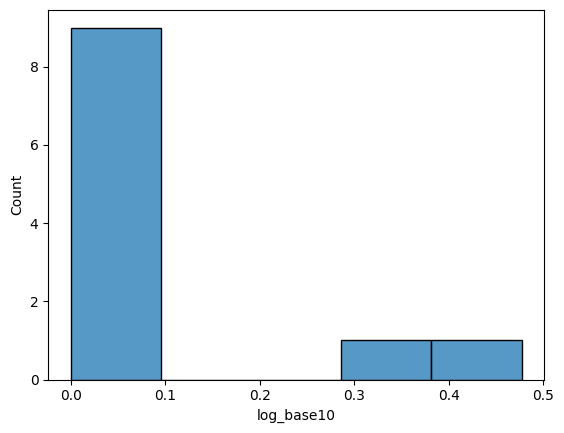

In [51]:
sns.histplot(data=num_farmers_markets, x=num_farmers_markets['log_base10'])

In [52]:
num_farmers_markets['log_base10'].describe()

count    11.000000
mean      0.070741
std       0.162239
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.477121
Name: log_base10, dtype: float64

In [53]:
scaler = StandardScaler()
num_farmers_markets['zstd'] = (num_farmers_markets['fm_count'] - np.mean(num_farmers_markets['fm_count']) / np.std(num_farmers_markets['fm_count']))

<Axes: xlabel='zstd', ylabel='Count'>

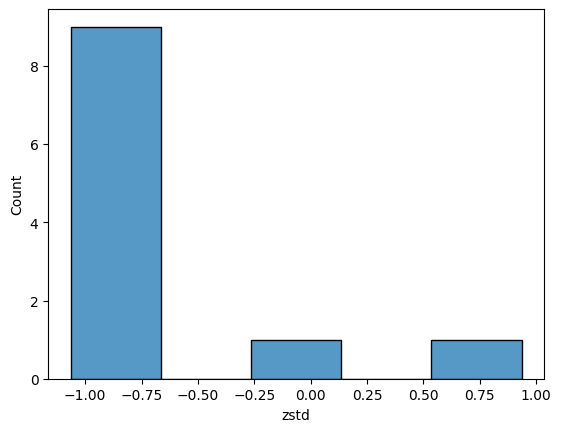

In [54]:
sns.histplot(num_farmers_markets['zstd'])

In [55]:
parks_counts['zstd'] = (parks_counts['parks_count'] - np.mean(parks_counts['parks_count']) / np.std(parks_counts['parks_count']))

In [56]:
parks_counts['log'] = np.log(parks_counts['parks_count'])

<Axes: xlabel='zstd', ylabel='Count'>

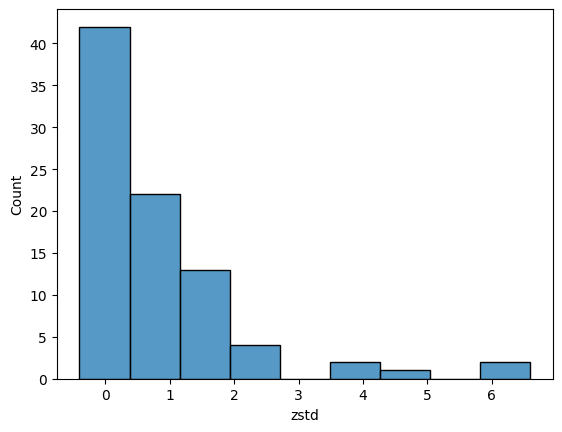

In [57]:
sns.histplot(parks_counts['zstd'])

<Axes: xlabel='zstd'>

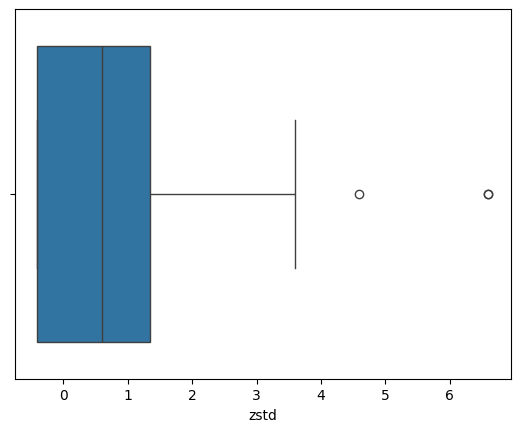

In [58]:
sns.boxplot(data=parks_counts, x='zstd')

<Axes: xlabel='log', ylabel='Count'>

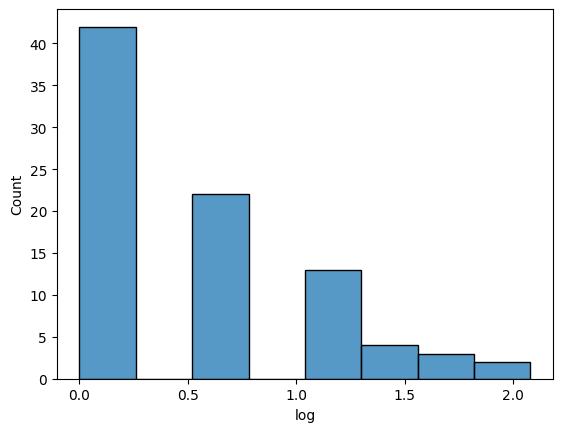

In [59]:
sns.histplot(parks_counts['log'])

<Axes: xlabel='Walk Score', ylabel='Count'>

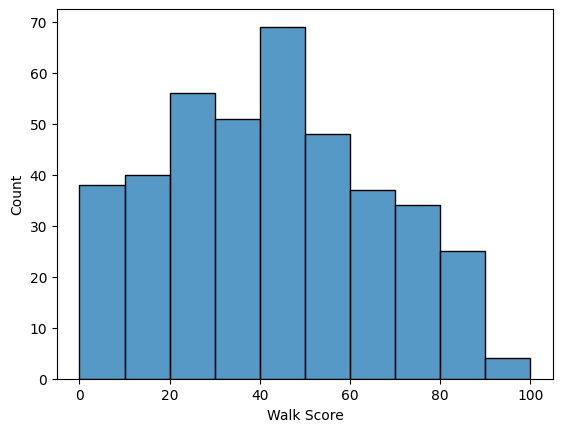

In [60]:
walk_score.dtypes
sns.histplot(data=walk_score,x= walk_score['Walk Score'], bins=10)

<Axes: xlabel='Walk Score'>

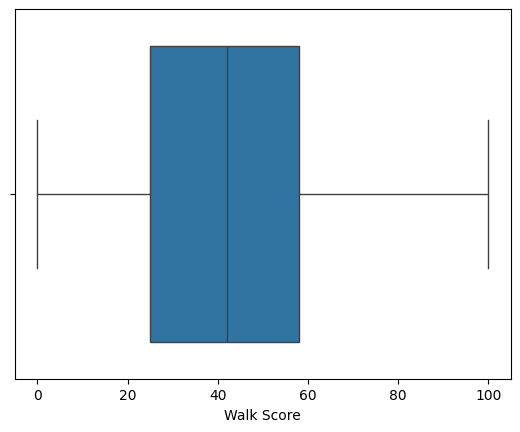

In [61]:
sns.boxplot(data=walk_score, x='Walk Score')

In [62]:
walk_score['Walk Score'].describe()

count    402.000000
mean      42.330846
std       23.404659
min        0.000000
25%       25.000000
50%       42.000000
75%       58.000000
max      100.000000
Name: Walk Score, dtype: float64

Walk score doesn't seem to show any outliers

In [63]:
obesity_rates.dtypes

2010 Tract                        object
City Neighborhood                 object
2006-2010 estimate of obesity    float64
dtype: object

<Axes: xlabel='2006-2010 estimate of obesity', ylabel='Count'>

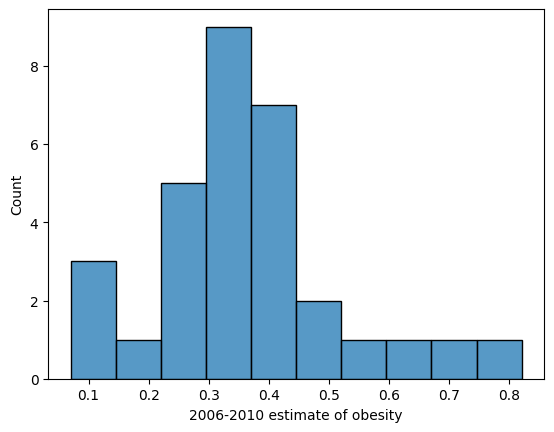

In [64]:
sns.histplot(data=obesity_rates,x= '2006-2010 estimate of obesity')

<Axes: xlabel='2006-2010 estimate of obesity'>

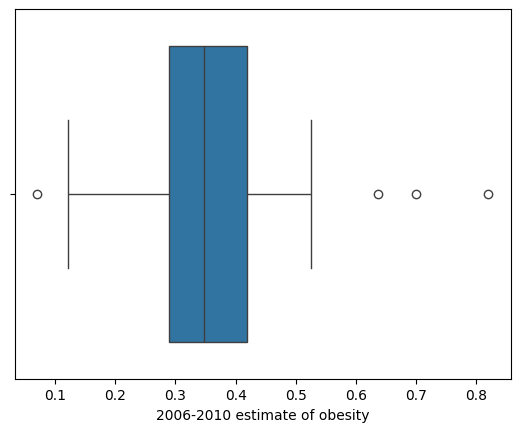

In [65]:
sns.boxplot(data=obesity_rates, x='2006-2010 estimate of obesity')

In [66]:
obesity_rates['2006-2010 estimate of obesity'].describe()

count    31.000000
mean      0.367351
std       0.155702
min       0.070353
25%       0.288704
50%       0.348089
75%       0.419149
max       0.820311
Name: 2006-2010 estimate of obesity, dtype: float64

Obesity rates do show some outliers, but I plan to keep those outliers, because they don't appear to be errors, but rather valid entries in the datasets.

In [67]:
points_counts['point_count'].describe()

count    137.000000
mean      21.649635
std       14.072079
min        1.000000
25%       13.000000
50%       19.000000
75%       28.000000
max      104.000000
Name: point_count, dtype: float64

<Axes: xlabel='point_count'>

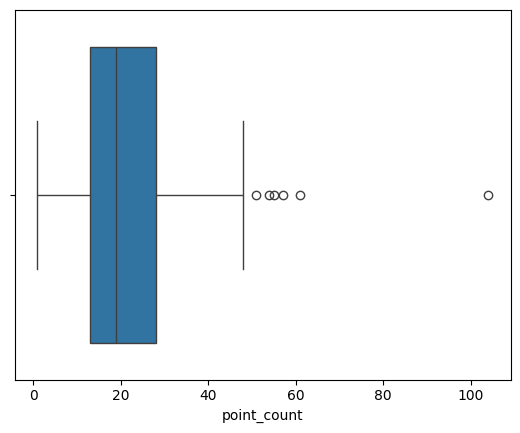

In [68]:
sns.boxplot(data=points_counts, x='point_count')

Similarly for Obesity, these seem like valid values and so I will not discard them

<Axes: xlabel='point_count', ylabel='Count'>

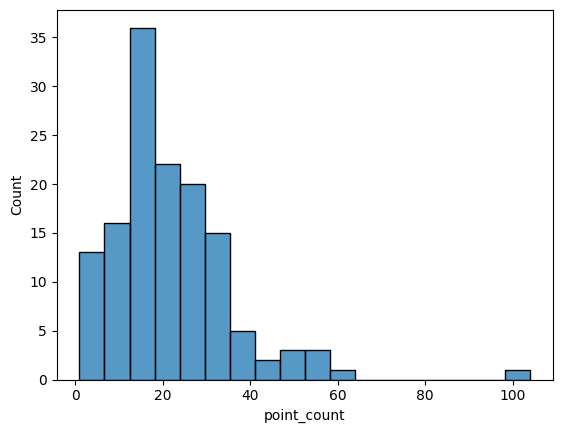

In [69]:
sns.histplot(data=points_counts,x= 'point_count')

### Evaluating Distributions
Farmers Markets and Number of Parks is highly skewed, so that will need to be addressed.

In [70]:
scaling = StandardScaler()
num_farmers_markets.head()

,tractce10,fm_count,log_base10,zstd
0,20100,2,0.30103,-0.064187
1,40200,1,0.00000,-1.064187
2,40500,1,0.00000,-1.064187
3,60300,1,0.00000,-1.064187
4,80400,1,0.00000,-1.064187


In [71]:
num_farmers_markets['fm_count'] = scaling.fit_transform(num_farmers_markets[['fm_count']])

<Axes: xlabel='fm_count', ylabel='Count'>

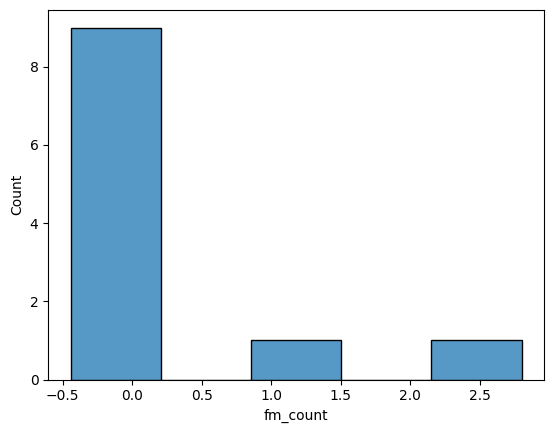

In [72]:
sns.histplot(data=num_farmers_markets, x=num_farmers_markets['fm_count'])

In [73]:
parks_counts['zstd'] = (parks_counts['parks_count'] - np.mean(parks_counts['parks_count']) / np.std(parks_counts['parks_count']))

In [74]:
num_farmers_markets.rename(columns={'tractce10': 'census_tract'}, inplace=True)
parks_counts.rename(columns={'tractce10_1': 'census_tract'}, inplace=True)

### (Re)Evaluating Scale of numeric variables

In [75]:
points_counts['point_count'].describe()

count    137.000000
mean      21.649635
std       14.072079
min        1.000000
25%       13.000000
50%       19.000000
75%       28.000000
max      104.000000
Name: point_count, dtype: float64

In [76]:
obesity_rates['2006-2010 estimate of obesity'].describe()

count    31.000000
mean      0.367351
std       0.155702
min       0.070353
25%       0.288704
50%       0.348089
75%       0.419149
max       0.820311
Name: 2006-2010 estimate of obesity, dtype: float64

In [77]:
walk_score['Walk Score'].describe()

count    402.000000
mean      42.330846
std       23.404659
min        0.000000
25%       25.000000
50%       42.000000
75%       58.000000
max      100.000000
Name: Walk Score, dtype: float64

### Conclusion
- Even though the two predictors I plan on using, that being the Walk Score and the number of transit stops within a census tract are actually on quite similar scales, I believe that I will scale the variables anyways

In [78]:
scaler = StandardScaler()
walk_score['Walk Score'] = scaler.fit_transform(walk_score[['Walk Score']])
points_counts['point_count'] = scaler.fit_transform(points_counts[['point_count']])
points_counts['point_count'].describe()

count    1.370000e+02
mean     1.037289e-16
std      1.003670e+00
min     -1.472804e+00
25%     -6.169221e-01
50%     -1.889812e-01
75%      4.529302e-01
max      5.873515e+00
Name: point_count, dtype: float64

In [79]:
walk_score['Walk Score'].describe()

count    4.020000e+02
mean     1.414015e-16
std      1.001246e+00
min     -1.810904e+00
25%     -7.414097e-01
50%     -1.415351e-02
75%      6.703229e-01
max      2.467074e+00
Name: Walk Score, dtype: float64

In [80]:
points_counts['point_count'].describe()

count    1.370000e+02
mean     1.037289e-16
std      1.003670e+00
min     -1.472804e+00
25%     -6.169221e-01
50%     -1.889812e-01
75%      4.529302e-01
max      5.873515e+00
Name: point_count, dtype: float64

### Combining the various dataframes to enable comparison between the variables

In [81]:
walk_score.head()

,Census Tract,Walk Score
0,10300,1.697038
1,20100,2.467074
2,20300,1.739817
3,30500,1.483139
4,40200,1.226460


In [82]:
obesity_rates.head()

,2010 Tract,City Neighborhood,2006-2010 estimate of obesity
59,562900,Hazelwood,0.399853
364,561600,Arlington,0.334520
365,561600,Arlington Heights,0.473120
366,561700,Saint Clair,0.699500
367,561700,Mount Oliver Neighborhood,0.380567


In [83]:
points_counts.head()

,tractce10,point_count
0,010300,0.524254
1,020100,5.873515
2,020300,0.666901
3,030500,0.524254
4,040200,0.952195


In [84]:
walk_score = walk_score.rename(columns={'Census Tract': 'census_tract'})

In [85]:
obesity_rates = obesity_rates.rename(columns={'2010 Tract' : 'census_tract'})

In [86]:
points_counts = points_counts.rename(columns={'tractce10' : 'census_tract'})

In [87]:
walk_score.head()


,census_tract,Walk Score
0,10300,1.697038
1,20100,2.467074
2,20300,1.739817
3,30500,1.483139
4,40200,1.226460


In [88]:
obesity_rates.head()

,census_tract,City Neighborhood,2006-2010 estimate of obesity
59,562900,Hazelwood,0.399853
364,561600,Arlington,0.334520
365,561600,Arlington Heights,0.473120
366,561700,Saint Clair,0.699500
367,561700,Mount Oliver Neighborhood,0.380567


In [89]:
points_counts.head()

,census_tract,point_count
0,010300,0.524254
1,020100,5.873515
2,020300,0.666901
3,030500,0.524254
4,040200,0.952195


In [90]:
points_counts['census_tract'] = points_counts['census_tract'].str.lstrip('0')

In [91]:
points_counts.head()

,census_tract,point_count
0,10300,0.524254
1,20100,5.873515
2,20300,0.666901
3,30500,0.524254
4,40200,0.952195


In [92]:
merged_df = pd.merge(obesity_rates, points_counts, on='census_tract')

In [93]:
merged_df.head()

,census_tract,City Neighborhood,2006-2010 estimate of obesity,point_count
0,562900,Hazelwood,0.399853,0.880871
1,561600,Arlington,0.334520,-0.759569
2,561600,Arlington Heights,0.473120,-0.759569
3,561700,Saint Clair,0.699500,-0.688246
4,561700,Mount Oliver Neighborhood,0.380567,-0.688246


In [94]:

walk_score['census_tract'] = walk_score['census_tract'].astype('Int64')
merged_df['census_tract'] = merged_df['census_tract'].astype('Int64')
# Merge the DataFrames
df2 = pd.merge(merged_df, walk_score, on='census_tract')

In [95]:
df2['census_tract'] = df2['census_tract'].astype('Int64')
environmental_justice_areas['census_tract'] = environmental_justice_areas['census_tract'].astype('Int64')

# Now merge
df = pd.merge(df2, environmental_justice_areas, on='census_tract')

In [96]:
num_farmers_markets.head()


,census_tract,fm_count,log_base10,zstd
0,20100,1.179536,0.30103,-0.064187
1,40200,-0.442326,0.00000,-1.064187
2,40500,-0.442326,0.00000,-1.064187
3,60300,-0.442326,0.00000,-1.064187
4,80400,-0.442326,0.00000,-1.064187


In [97]:
parks_counts.head()

,census_tract,parks_count,zstd,log
0,010300,1,-0.402247,0.000000
1,020100,8,6.597753,2.079442
2,020300,2,0.597753,0.693147
3,030500,3,1.597753,1.098612
4,040200,1,-0.402247,0.000000


In [98]:
num_farmers_markets.drop(['log_base10', 'zstd'], axis=1, inplace=True)
parks_counts.drop(['parks_count', 'log'], axis=1, inplace=True)

In [99]:
df4 = pd.merge(num_farmers_markets, parks_counts, on='census_tract')

In [100]:
df4.head()

,census_tract,fm_count,zstd
0,111500,2.801397,6.597753
1,130300,-0.442326,-0.402247
2,170200,-0.442326,2.597753
3,191600,-0.442326,2.597753
4,290200,-0.442326,-0.402247


In [101]:
df4.rename(columns={'zstd' : 'parks_cnt_zstd'}, inplace=True)

In [102]:
df4.head()

,census_tract,fm_count,parks_cnt_zstd
0,111500,2.801397,6.597753
1,130300,-0.442326,-0.402247
2,170200,-0.442326,2.597753
3,191600,-0.442326,2.597753
4,290200,-0.442326,-0.402247


In [ ]:
df4['census_tract'] = df4['census_tract'].astype('Int64')
df5 = pd.merge(df, df4, on='census_tract', how='left')

ValueError: You are trying to merge on Int64 and object columns for key 'census_tract'. If you wish to proceed you should use pd.concat

In [ ]:
df.head()

,census_tract,City Neighborhood,2006-2010 estimate of obesity,point_count,Walk Score,EJ_Area,fm_count,parks_cnt_zstd


In [ ]:
numeric_df = df.select_dtypes(include=np.number)


In [ ]:
numeric_df.head()

,census_tract,2006-2010 estimate of obesity,point_count,Walk Score
0,562900,0.399853,0.880871,-1.040868
1,561600,0.334520,-0.759569,-0.698630
2,561600,0.473120,-0.759569,-0.698630
3,561700,0.699500,-0.688246,-0.698630
4,561700,0.380567,-0.688246,-0.698630


In [ ]:
numeric_df.corr()

,census_tract,2006-2010 estimate of obesity,point_count,Walk Score
census_tract,1.000000,0.035985,-0.198613,0.364722
2006-2010 estimate of obesity,0.035985,1.000000,-0.032027,-0.407194
point_count,-0.198613,-0.032027,1.000000,-0.003873
Walk Score,0.364722,-0.407194,-0.003873,1.000000
